#  Salary Prediction using Machine Learning

This project predicts **employee salary** based on features like **Age, Years of Experience, and other attributes** using supervised machine learning.

The goal is to understand the relationship between experience and salary and build a model that can accurately predict salaries.


## Importing Required Libraries

We import essential libraries for:
- Data handling (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Model building (Scikit-Learn)


In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

The dataset is loaded into a Pandas DataFrame to begin data exploration and preprocessing.


In [305]:
df= pd.read_csv('Salary_Data (1).csv')

## Understanding Data Distribution

We use a **histogram** to visualize how values are distributed across numerical features.  
This helps identify skewness, spread, and data patterns.


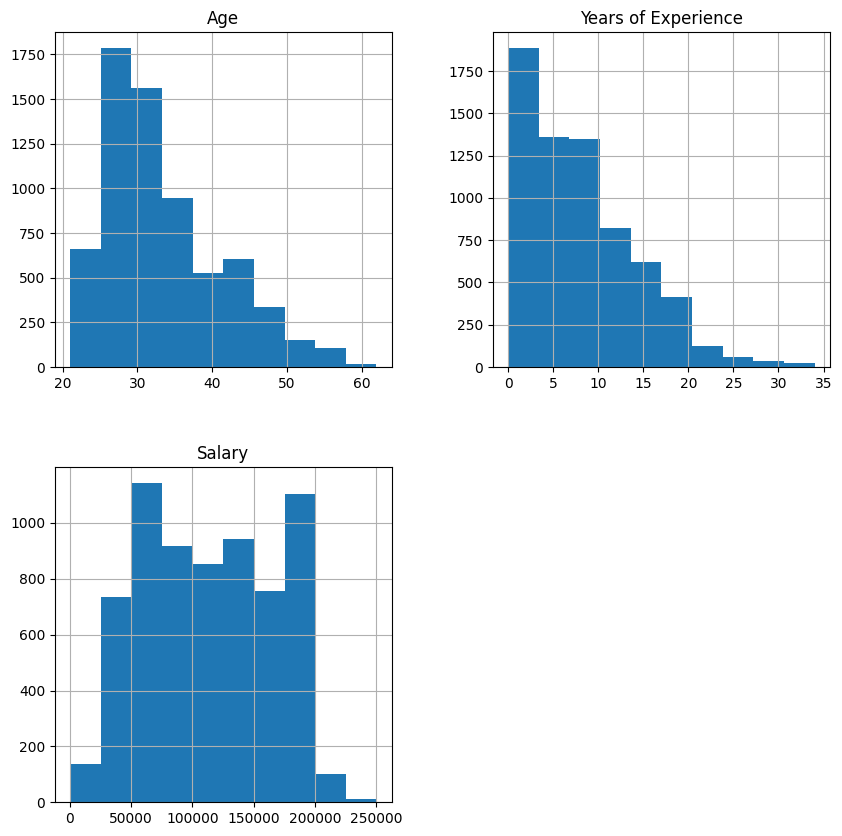

In [306]:
df.hist(figsize=(10,10))
plt.show()

## Initial Data Exploration

We examine the dataset using:
- `head()` → First rows  
- `tail()` → Last rows  
- `shape` → Number of rows & columns  
- `info()` → Data types & null values  
- `describe()` → Statistical summary


In [307]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [308]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [309]:
df.shape

(6704, 6)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [311]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## Handling Missing Values

We check for missing values using `isnull().sum()`.

Strategy used:
- Numerical columns → Filled with **mean**
- Categorical columns → Filled with **mode**
- Rows where **Salary (target)** was missing → Removed


In [312]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [313]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)

/tmp/ipython-input-2861465248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-2861465248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [314]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)

/tmp/ipython-input-1732256440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-1732256440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [315]:
df=df.dropna(subset=['Salary'])

## Removing Duplicate Records

Duplicate entries can bias the model, so we:
- Check duplicates using `duplicated().sum()`
- Remove them using `drop_duplicates()`


In [316]:
df.duplicated().sum()

np.int64(4911)

In [317]:
df.drop_duplicates(inplace=True)

## Data Type Optimization

We checked if **Age** and **Years of Experience** contained decimal values or not.


Since the result was 0.0, Age was safely converted from float → int.

Years of Experience was not converted because it contains decimal values.


In [318]:
(df['Age']% 1).sum()

np.float64(0.0)

In [319]:
df['Age']=df['Age'].astype(int)

In [320]:
(df['Years of Experience']% 1).sum()

np.float64(6.0)

## Encoding Categorical Variables

Machine learning models require numerical input, so categorical columns were converted into numerical form using encoding techniques.


In [321]:
df_encoded=pd.get_dummies(df,drop_first=True)

## Splitting Data into Training and Testing Sets

We split the dataset into:
- 80% Training Data
- 20% Testing Data

This ensures unbiased evaluation of the model.


In [322]:
X=df_encoded.drop("Salary", axis=1)
y=df_encoded["Salary"]

In [323]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

We applied feature scaling to standardize feature values.  
This improves model performance, especially for Linear Regression.


In [324]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Visualizing Relationship (Experience vs Salary)

A scatter plot was created between **Years of Experience** and **Salary**.

The pattern showed a strong **linear relationship**, which helped us choose **Linear Regression**.


<Axes: xlabel='Years of Experience', ylabel='Salary'>

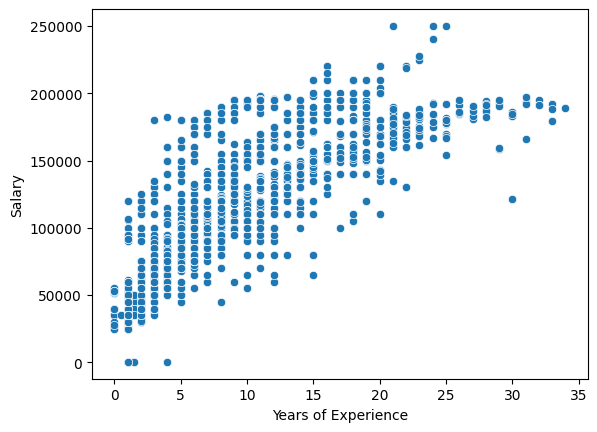

In [325]:
sns.scatterplot(x='Years of Experience', y='Salary', data=df)

## Training the Model

We trained a **Linear Regression model** to predict salary.


In [326]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

## Model Evaluation

We evaluated the model using:

- **R² Score** → Measures how well the model explains variance  
- **MAE (Mean Absolute Error)** → Average prediction error  
- **MSE (Mean Squared Error)** → Penalizes larger errors


In [327]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=regressor.predict(X_test_scaled)
print('r2 score:', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))


r2 score: 0.8533943974663132
MAE: 14768.411552611988
MSE: 400897238.7335898


## Actual vs Predicted Salaries

A scatter plot comparing actual and predicted salaries shows how closely the model predictions match real values.


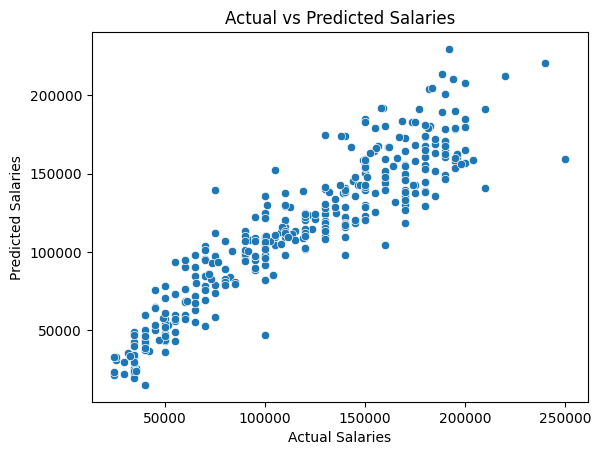

In [328]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs Predicted Salaries')
plt.show()


## Conclusion
The model successfully captures the relationship between experience and salary, achieving **85% variance explanation**, making it a strong predictive system.

The model shows that years of experience and education level strongly influence salary.

